[**Dr. Kevin M. Moerman**](mailto:kevin.moerman@nuigalway.ie), _Lecturer in Biomedical Engineering_   

National University of Ireland Galway.   

---

\newpage

This is an [Octave](https://www.gnu.org/software/octave/) (an open source alternative to MATLAB) [Jupyter notebook](https://jupyter.org/)

\newpage

# Hyperelastic materials

## Introduction
* So-called __hyperelastic__ formulations are non-linear constitutive (material behaviour) "laws" which are useful to describe nonlinear elastic materials undergoing large (finite strain) deformation.   
  

* In hyperelasticity the constitutive or material law is defined by a so __strain energy density__ function often denoted by a $W$ or $\Psi$ symbol.   
  

* $\Psi$ is a __scalar function__ (so not a tensor or vector valued function). 
  

* The strain energy density function has units of __energy per unit volume__ such as $J/m^3$.   
  
 
* However if one recalls that $J$ can be written in terms of $Nm$, then we see that $J/m^3=Nm/m^3=N/m^2$, which means we may equivalently say that $\Psi$ has __units of stress__. 

## Stress computation
* Derivatives of $\Psi$ with a deformation metric provide a stress metric (there are different types of strains each with their own _work conjugate_ stress type).   
  

* For instance, the second _Piola-Kirchoff stress_ $\mathbf{S}$ is obtained through the derivative with the _Green-Lagrange strain_ $\mathbf{E}$
$$\mathbf{S}=\frac{\partial \Psi}{\partial \mathbf{E}}$$
  
  
* We tend to focus on the _true stres_ or __Cauchy stress__ $\boldsymbol{\sigma}$, which is obtained through with the aid of the _deformation gradient tensor_ $\mathbf{F}$: 

$$\boldsymbol{\sigma}=J^{-1}\mathbf{F}\mathbf{S}\mathbf{F}^\top$$

* In some cases formulations are specified using the _principal stretches_ $\lambda_i$. These may also be used to derived (principal) stresses e.g.: 
$$\sigma_i=J^{-1} \lambda_i \frac{\partial \Psi}{\partial \lambda_i}$$

## Three types of hyperelastic formulations
* Three types of hyperelastic formulation types are treated here with a focus on the Ogden formulation:  
  
1. __Constrained__ formulations (a.k.a "incompressible" formulations)   
$$\Psi(\lambda_1,\lambda_2,\lambda_3)=\sum_{a=1}^{N} \frac{c_a}{m_a^2}\big(\lambda_1^{m_a}+\lambda_2^{m_a}+\lambda_3^{m_a}-3\big)$$
  
2. __Unconstrained__ or __coupled__ formulations (a.k.a "compressible" formulations)  
$$\Psi(\lambda_1,\lambda_2,\lambda_3)=\frac{\kappa'}{2}(J-1)^2 + \sum_{a=1}^{N} \frac{c_a}{m_a^2}\big(\lambda_1^{m_a}+\lambda_2^{m_a}+\lambda_3^{m_a}-3 - m_a \ln{(J)}\big)$$
  
3. __Uncoupled__ formulations (a.k.a "nearly incompressible" formulations)  
$$\Psi(\tilde{\lambda}_1,\tilde{\lambda}_2,\tilde{\lambda}_3)=\frac{\kappa}{2}\ln{(J)}^2 + \sum_{a=1}^{N} \frac{c_a}{m_a^2}\big(\tilde{\lambda}_1^{m_a}+\tilde{\lambda}_2^{m_a}+\tilde{\lambda}_3^{m_a}-3\big)$$

  
* This notebook discusses these and provides example implementations for uniaxial loading and first order $N=1$ __Ogden hyperelastic__ formulations. 
 
For more background information see chapter 6 Hyperelasticity" in Holzapfel's book: _G. Holzapfel, Nonlinear solid mechanics: A continuum approach for engineering. John Wiley & Sons Ltd., 2000._

### Anatomy of the Ogden formulation 

* Typically the Ogden formulation looks something like this (contrained form showed here, implementations vary depending on software): 
$$\Psi(\lambda_1,\lambda_2,\lambda_3)=\sum_{a=1}^{N} \frac{c_a}{m_a^2}\big(\lambda_1^{m_a}+\lambda_2^{m_a}+\lambda_3^{m_a}-3\big)$$

* If we "distribute" the -3 as a set of -1's, and work a factor $\frac{1}{m_a}$ into the summation we can see the above is equivalent to: 
$$\Psi(\lambda_1,\lambda_2,\lambda_3)=\sum_{a=1}^{N} \frac{c_a}{m_a}\big(\frac{1}{m_a}(\lambda_1^{m_a}-1) + \frac{1}{m_a}(\lambda_2^{m_a}-1)+\frac{1}{m_a}(\lambda_3^{m_a}-1) \big)$$

* Now one may recognize these as the Seth-Hill class of strains
$$E^{(m_a)}_i=\frac{1}{m_a}(\lambda_i^{m_a}-1)$$

* For instance using $m_a=2$ makes it use the Green-Lagrange strain $\mathbf{E}$
$$E_i=\frac{1}{2}(\lambda_i^{2}-1)$$

* Furthermore we may recognize that the sum of such parts for is actually the trace of such a strain tensor leading to: 
$$\Psi=\sum_{a=1}^{N} \frac{c_a}{m_a}\mathrm{tr}(\mathbf{E}^{(m_a)})$$

* So the Ogden formulation is a powerful law where we define energies by scaling (multiplying) the trace of a chosen _"strain type"_ (defined by $m_a$) by a stiffness parameter $c_a$. Summing lots of terms ($N>1$) allows one to capture complex stiffnening behaviour. 

* The Ogden formulation can also conveniently be used as the __"mother" of many other formulations__ 
   

* Using $N=1$ and $m_1=2$ makes the Ogden formulation reduce to a __Neo-Hookean__ formulation
$$\Psi(\lambda_1,\lambda_2,\lambda_3)=\frac{c_1}{4}\big(\lambda_1^{2}+\lambda_2^{2}+\lambda_3^{2}-3\big)=\frac{c_1}{4}\big(I_1-3\big)=\frac{c_1}{2}\mathrm{tr}(\mathbf{E})$$
     
     
* The Neo-Hookean is one of the simples hyperelastic formulations and is named after the fact that it can be thought of as an extension of Hooke's law to non-linear solid mechanics (it reduces to Hooke's law for infinitesimal strains). 


* Using $N=2$ and $m_1=-m_2=2$ makes the Ogden formulation reduce to a __Mooney-Rivlin__ formulation (if $J=1$)
$$\Psi(\lambda_1,\lambda_2,\lambda_3)=\frac{c_1}{4}\big(\lambda_1^{2}+\lambda_2^{2}+\lambda_3^{2}-3\big)+\frac{c_2}{4}\big(\lambda_1^{-2}+\lambda_2^{-2}+\lambda_3^{-2}-3\big)=\frac{c_1}{4}\big(I_1-3\big)+\frac{c_2}{4}\big(I_2-3\big)$$
  
  
_In the above $I_1$ and $I_2$ are known as the first and second invariants of the right Cauchy green tensor $\mathbf{C}$. These often appear in the literature._

\newpage

#### Defining shared variables used by the example numerical implementations

In [1]:
%% Define parameters common to all examples

%Define material parameters
N=1; %The Ogden law order
c1=1; %The shear modulus like parameter
m1=12; %The non-linearity parameter
kp=1000; %Bulk modulus like parameter (used for constrained model)
k=kp; %Bulk modulus (used for uncoupled model)

%Derive applied stretch
appliedStretch=1.3; %Set applied stretch
nDataPoints=50; %Number of data points to use for evaluation and graph
lambda_3=linspace(1,appliedStretch,nDataPoints); %The 3 direction stretch

\newpage

## Constrained formulations
* The word "constrained" relates to the fact that incompressible behaviour (no volume change) is enforced in the formulation. 

* These formulations are not really used in FEA and instead serve as means to easily derive analytical solutions for incompressible behaviour "by hand". 



### The constrained Ogden formulation
* The constrained Ogden formulation is often presented as: 
$$\Psi(\lambda_1,\lambda_2,\lambda_3)=\sum_{a=1}^{N} \frac{c_a}{m_a^2}\big(\lambda_1^{m_a}+\lambda_2^{m_a}+\lambda_3^{m_a}-3\big)$$

* However, something is missing in the above, namely the treatment of the hydrostatic presssure $p$ and its contribution. 
$$\Psi(\lambda_1,\lambda_2,\lambda_3,p)=U(p) + \sum_{a=1}^{N} \frac{c_a}{m_a^2}\big(\lambda_1^{m_a}+\lambda_2^{m_a}+\lambda_3^{m_a}-3\big)$$

* For these constrained forms the contribution $U(p)$ is not derived from the constitutive equation but is instead determined using the boundary conditions. 


* Below an example for uniaxial loading is presented. 

* The uniaxial load (e.g. a tensile or compressive stretch) is here specified in the 3rd (or Z) direction, which means $\lambda_3 \neq 1$. 

* Using the "incompressiblity" and uniaxial loading assumption we can formulate some useful relations to help solve for the stress. 

* First of all, the uniaxial conditions mean the other "lateral" stretches are equivalent:
$$\lambda_1=\lambda_2$$

* Secondly, if the material is truely incompressible we have $J=\lambda_1 \lambda_2 \lambda_3 = 1$, and since $\lambda_1=\lambda_2$ we can derive: 

$$J= \lambda_1 \lambda_1 \lambda_3 = \lambda_1^2 \lambda_3 = 1 \rightarrow \lambda_1=\lambda_2= \sqrt{\frac{1}{\lambda_3}}=\lambda_3^{-\frac{1}{2}}$$

* Thirdly for uniaxial conditions there is only one none-zero stress, the applied stress $\sigma_3=\sigma_{33}$, therefore: 
$$\sigma_1=\sigma_2=\sigma_{11}=\sigma_{22}=0$$

* So now with an assummed $J=1$, the ability to express all stretches in terms of $\lambda_3$ (the known applied stretch), and the fact that $\sigma_1=\sigma_2=0$, we are ready to start tackling the full stress evaluation. 


* First the Cauchy stress tensor $\boldsymbol{\sigma}$ is defined as: 
$$\boldsymbol{\sigma}=\bar{\boldsymbol{\sigma}}-\bar{p}\mathbf{I}$$

* The contribution $\bar{\boldsymbol{\sigma}}$ is derived from the constitutive equation:
$$\Psi(\lambda_1,\lambda_2,\lambda_3)=\sum_{a=1}^{N} \frac{c_a}{m_a^2}\big(\lambda_1^{m_a}+\lambda_2^{m_a}+\lambda_3^{m_a}-3\big)$$

    and is obtained from: 
$$\bar{\sigma}_i=\lambda_i \frac{\partial \Psi}{\partial \lambda_i}$$

* Leading to: 
$$\bar{\sigma}_i=\sum_{a=1}^{N} \frac{c_a}{m_a}\lambda_i^{m_a}$$

* The next step is to determine $\bar{p}$ in this relation: 
$$\boldsymbol{\sigma}=\bar{\boldsymbol{\sigma}}-\bar{p}\mathbf{I}$$

* First lets rewrite the above in terms of the principal components $\sigma_i$
$$\sigma_i=-\bar{p} +\sum_{a=1}^{N} \frac{c_a}{m_a}\lambda_i^{m_a}$$

* Next we use $\sigma_1=\sigma_2=0$ to derive an expression for $\bar{p}$:
$$\sigma_1=\sigma_2=-\bar{p} + \sum_{a=1}^{N} \frac{c_a}{m_a}\lambda_1^{m_a}=0$$

$$\rightarrow \bar{p}=\sum_{a=1}^{N} \frac{c_a}{m_a} \lambda_1^{m_a}$$

* Finaly, implementing $\lambda_1=\lambda_2=\lambda_3^{-\frac{1}{2}}$ leads to: 
$$\rightarrow \bar{p}=\sum_{a=1}^{N} \frac{c_a}{m_a}(\lambda_3^{-\frac{1}{2}})^{m_a}=\sum_{a=1}^{N} \frac{c_a}{m_a} \lambda_3^{-\frac{m_a}{2}} $$

* Which therefore allows for the formulation of an expression for $\bar{\sigma}_3$: 
$$\sigma_3=-\bar{p} + \sum_{a=1}^{N} \frac{c_a}{m_a} \lambda_3^{m_a}=-\sum_{a=1}^{N} \frac{c_a}{m_a} \lambda_3^{-\frac{m_a}{2}} + \sum_{a=1}^{N} \frac{c_a}{m_a} \lambda_3^{m_a}$$

* Which can be simplified to: 
$$\sigma_3=\sum_{a=1}^{N} \frac{c_a}{m_a}\big(\lambda_3^{m_a} - \lambda_3^{-\frac{m_a}{2}} \big)$$


* The full Cauchy stress tensor can then be written as: 
$$\boldsymbol{\sigma}=\sigma_3 \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 1\end{bmatrix}=\sum_{a=1}^{N} \frac{c_a}{m_a}\big(\lambda_3^{m_a} - \lambda_3^{-\frac{m_a}{2}} \big) \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 1\end{bmatrix}$$
  
 
* Note that although $\bar{p}$ is a type of pressure contribution, it should not be confused with the full hydrostatic pressure $p$ which is derived from: 
$$p=-\frac{1}{3}\mathrm{tr}{(\boldsymbol{\sigma})}=-\frac{\sigma_3}{3}$$
    

\newpage

### Numerical implementation
#### Compute stresses

In [2]:
%% The constrained formulation

%Direct stress computation
S3=(c1/m1).*(lambda_3.^m1-lambda_3.^(-m1/2));
S1=zeros(size(S3));
S2=zeros(size(S3));

%Compute Jacobian for plotting
lambda_1=sqrt(1./lambda_3);
lambda_2=lambda_1;
J=lambda_1.*lambda_2.*lambda_3; 

#### Visualize stresses

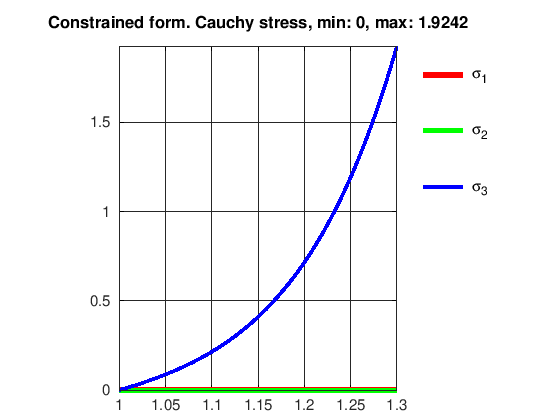

In [3]:
%Visualize stress graphs
figure; hold on; 
title(['Constrained form. Cauchy stress, min: ',num2str(min(S3(:))),...
', max: ',num2str(max(S3(:)))]); %Add title
h1=plot(lambda_3,S1,'r-','LineWidth',20); %The 1 direction principal stress
h2=plot(lambda_3,S2,'g-','LineWidth',15); %The 2 direction principal stress
h3=plot(lambda_3,S3,'b-','LineWidth',10); %The 3 direction principal stress
hl=legend([h1 h2 h3],{'\sigma_1','\sigma_2','\sigma_3'}); %Add legend
set(hl,'FontSize',15,'Location','NorthEastOutside','Box','off'); %Adjust legend
axis tight; axis square; grid on; box on; 
set(gca,'FontSize',15);

#### Visualize Jacobian

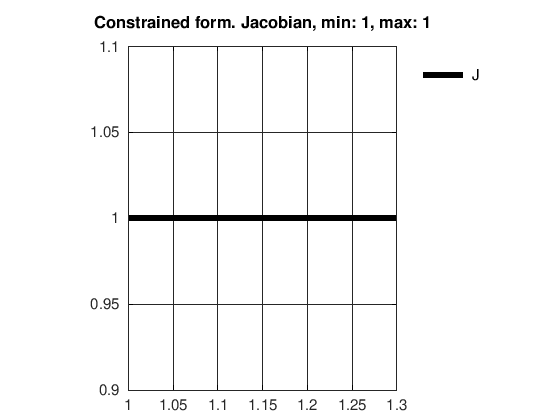

In [4]:
%Visualize Jacobian
figure; hold on; 
title(['Constrained form. Jacobian, min: ',num2str(min(J(:))),...
', max: ',num2str(max(J(:)))]); %Add title
h1=plot(lambda_3,J,'k-','LineWidth',20); %The 1 direction principal stress
hl=legend([h1],{'J'}); %Add legend
set(hl,'FontSize',15,'Location','NorthEastOutside','Box','off'); %Adjust legend
axis tight; axis square; grid on; box on; 
set(gca,'FontSize',15);

\newpage

## Unconstrained formulations
These formulations are also known as coupled formulations (some literature refers to these formulations as "compressible"). 

* The unconstrained Ogden formulation is given by

$$\Psi(\lambda_1,\lambda_2,\lambda_3)=\frac{\kappa'}{2}(J-1)^2 + \sum_{a=1}^{N} \frac{c_a}{m_a^2}\big(\lambda_1^{m_a}+\lambda_2^{m_a}+\lambda_3^{m_a}-3 - m_a \ln{(J)}\big)$$

* The principal Cauchy stresses $\sigma_i$ can be computed from: 

$$\sigma_i=J^{-1} \lambda_i \frac{\partial \Psi}{\partial \lambda_i}$$

* Leading to: 

$$\sigma_i=\kappa' \big( J-1 \big) + J^{-1} \sum_{a=1}^{N} \frac{c_a}{m_a}\big(\lambda_i^{m_a} - 1 \big)$$


### Step-by-step derivation: 

1. First compute
$$J^{-1} \lambda_i \frac{\partial}{\partial \lambda_i} \big( \frac{\kappa'}{2}(J-1)^2 \big)$$

2. Take derivative with respect to $\lambda_3$ and use symmetry
$$=J^{-1} \lambda_3 \frac{\partial}{\partial \lambda_3} \big( \frac{\kappa'}{2}(\lambda_1\lambda_2\lambda_3-1)^2 \big)$$

3. Expand square
$$=J^{-1} \lambda_3 \frac{\partial}{\partial \lambda_3} \big( \frac{\kappa'}{2}(\lambda_1^2\lambda_2^2\lambda_3^2-2\lambda_1\lambda_2\lambda_3+1) \big)$$

4. Evaluate derivative
$$=J^{-1} \lambda_3 \frac{\partial}{\partial \lambda_3} \big( \frac{\kappa'}{2}(\lambda_1^2\lambda_2^2\lambda_3^2-2\lambda_1\lambda_2\lambda_3+1) \big) = J^{-1} \lambda_3 \big( \frac{\kappa'}{2}(2\lambda_1^2\lambda_2^2\lambda_3-2\lambda_1\lambda_2) \big)$$

5. Remove factor of 2
$$=J^{-1} \lambda_3 \kappa' \big( \lambda_1^2\lambda_2^2\lambda_3-\lambda_1\lambda_2 \big)$$

6. Work in factor $\lambda_3$
$$=J^{-1} \kappa' \big( \lambda_1^2\lambda_2^2\lambda_3^2-\lambda_1\lambda_2\lambda_3 \big)$$

7. Recognize $J$ and $J^2$
$$=J^{-1} \kappa' \big( J^2-J \big)$$

8. Process division by $J$ (multiply by $J^{-1}$). This result holds for any $\lambda_i$
$$=\kappa' \big( J-1 \big)$$


9. Now compute the next part:
$$J^{-1} \lambda_i \frac{\partial}{\partial \lambda_i} \bigg( \sum_{a=1}^{N} \frac{c_a}{m_a^2}\big(\lambda_1^{m_a}+\lambda_2^{m_a}+\lambda_3^{m_a}-3 - m_a \ln{(J)}\big) \bigg)$$

10. First notice that summation can be moved: 

$$=\sum_{a=1}^{N} J^{-1} \lambda_i \frac{\partial}{\partial \lambda_i} \bigg( \frac{c_a}{m_a^2}\big(\lambda_1^{m_a}+\lambda_2^{m_a}+\lambda_3^{m_a}-3 - m_a \ln{(J)}\big) \bigg)$$

11. Next take derivative with respect to $\lambda_3$ and aim to use symmetry with respect to any stretch

$$=\sum_{a=1}^{N} J^{-1} \lambda_3 \frac{\partial}{\partial \lambda_3} \bigg( \frac{c_a}{m_a^2}\big(\lambda_1^{m_a}+\lambda_2^{m_a}+\lambda_3^{m_a}-3 - m_a \ln{(J)}\big) \bigg)$$

12. Use $\frac{\partial}{\partial \lambda_i}(\lambda_i^{m_a})=m_a \lambda_i^{m_a-1}$ and $\ln{(J)}=\ln{(\lambda_1\lambda_2\lambda_3)}=\ln{(\lambda_1)}+\ln{(\lambda_2)}+\ln{(\lambda_3)}$

$$=\sum_{a=1}^{N} J^{-1} \lambda_3 \frac{c_a}{m_a^2}\big( m_a \lambda_3^{m_a-1} - \frac{m_a}{\lambda_3} \big)$$

13. Multiply by $\lambda_3$ and move $J^{-1}$
$$=J^{-1} \sum_{a=1}^{N} \frac{c_a}{m_a^2}\big( m_a \lambda_3^{m_a} - m_a \big)$$

14. Simplify by removing $m_a$ factor
$$=J^{-1} \sum_{a=1}^{N} \frac{c_a}{m_a}\big(\lambda_3^{m_a} - 1 \big)$$


15. Generalise for any $\lambda_i$:
$$=J^{-1} \sum_{a=1}^{N} \frac{c_a}{m_a}\big(\lambda_i^{m_a} - 1 \big)$$

16. Combine step 8 and 15 to produce overall result:
$$\sigma_i=\kappa' \big( J-1 \big) + J^{-1} \sum_{a=1}^{N} \frac{c_a}{m_a}\big(\lambda_i^{m_a} - 1 \big)$$

### How to compute stresses? 
* The stress equations have the unknown $J$ as well as $\lambda_1$ and $\lambda_2$: 
$$\sigma_i=\kappa' \big( J-1 \big) + J^{-1} \sum_{a=1}^{N} \frac{c_a}{m_a}\big(\lambda_i^{m_a} - 1 \big)$$

* The uniaxial loading conditions and boundary conditions help simplify this to a single unknown

* First of all uniaxial loading in the 3rd or Z-direction means $$\lambda_1=\lambda_2$$

* Next we can use the definition of the Jacobian to come to expressions for $\lambda_1$ and $\lambda_2$

* Since we have $J=\lambda_1 \lambda_2 \lambda_3$, and $\lambda_1=\lambda_2$ we can derive: 
$$J=\lambda_1 \lambda_2 \lambda_3 = \lambda_1 \lambda_1 \lambda_3 = \lambda_1^2 \lambda_3 $$
$$\rightarrow \lambda_1=\lambda_2= \sqrt{\frac{J}{\lambda_3}}$$

* The above shows that although $\lambda_3$ is known, knowledge of $J$ is required in order to determine $\lambda_1$ and $\lambda_2$. Or conversely  $\lambda_1$ (or $\lambda_2$) needs to be determined allowing for the computation of $J$. Eitherway one unknown remains.   
  

* To solve for the unkown $J$ we may use the fact that $\sigma_1=\sigma_2=0$
$$\sigma_1=\kappa' \big( J-1 \big) + J^{-1} \sum_{a=1}^{N} \frac{c_a}{m_a}\big(\lambda_1^{m_a} - 1 \big)=0$$

* If we solve for $J$ we can use $\lambda_1=\sqrt{\frac{J}{\lambda_3}}$ and write: 
$$\sigma_1=\kappa' \big( J-1 \big) + J^{-1} \sum_{a=1}^{N} \frac{c_a}{m_a}\bigg(\bigg(\frac{J}{\lambda_3}\bigg)^{\frac{m_a}{2}} - 1 \bigg)$$  

  
* Or if instead we solve for $\lambda_1$ we can use $J=\lambda_1^2\lambda_3$ and write:
$$\sigma_1=\kappa' \big( (\lambda_1^2 \lambda_3 )-1 \big) + \frac{1}{\lambda_1^2 \lambda_3} \sum_{a=1}^{N} \frac{c_a}{m_a}\big(\lambda_1^{m_a} - 1 \big)=0$$  

  
* Solving these is not trivial but numerical solutions are derived below for $J$

\newpage

### Numerical implementation
#### Compute stresses

In [5]:
%% The unconstrained or coupled formulation 

% One approach is to define a function for S1 and to find the J for which it is zero. 
% For this application the fzero function is useful to find J for S1(J)=0.

%Compute Jacobian given boundary conditions S1=S2=0
J=zeros(size(lambda_3)); %Initialize an arry of J values which are all zeros
for q=1:1:nDataPoints %Loop over all data points
    %Create stress function with current lambda
    S1_fun=@(J) kp*(J-1)+(1/J)*(c1/m1)*((sqrt(J/lambda_3(q)).^m1)-1);    
    
    %Find Jacobian for zero stress, use J=1 as initial
    J(q)=fzero(S1_fun,1); %Find root of nonlinear function   
end

%Compute transverse stretches using J values
lambda_1=sqrt(J./lambda_3);
lambda_2=lambda_1; %Due to uniaxial loading

%Compute principal stresses (note, these are not ordered)
S1=kp*(J-1)+(1./J).*(c1/m1).*((lambda_1.^m1)-1);
S2=kp*(J-1)+(1./J).*(c1/m1).*((lambda_2.^m1)-1);
S3=kp*(J-1)+(1./J).*(c1/m1).*((lambda_3.^m1)-1);

#### Visualize stresses

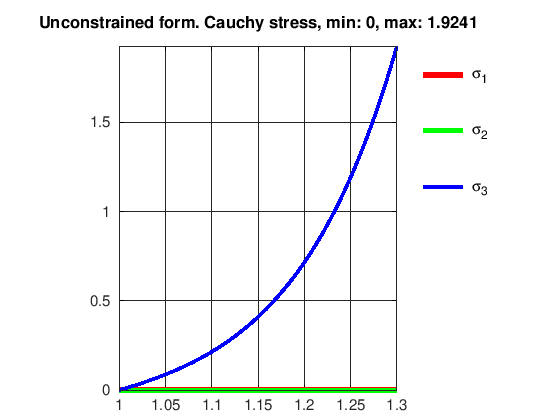

In [6]:
%Visualize stress graphs
figure; hold on; 
title(['Unconstrained form. Cauchy stress, min: ',num2str(min(S3(:))),...
', max: ',num2str(max(S3(:)))]); %Add title
h1=plot(lambda_3,S1,'r-','LineWidth',20); %The 1 direction principal stress
h2=plot(lambda_3,S2,'g-','LineWidth',15); %The 2 direction principal stress
h3=plot(lambda_3,S3,'b-','LineWidth',10); %The 3 direction principal stress
hl=legend([h1 h2 h3],{'\sigma_1','\sigma_2','\sigma_3'}); %Add legend
set(hl,'FontSize',15,'Location','NorthEastOutside','Box','off'); %Adjust legend
axis tight; axis square; grid on; box on; 
set(gca,'FontSize',15);

#### Visualize Jacobian

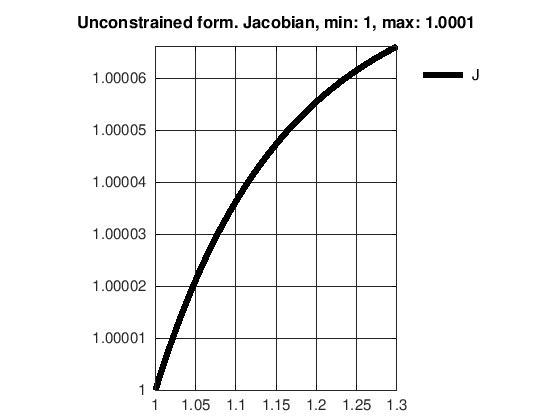

In [7]:
%Visualize Jacobian
figure; hold on; 
title(['Unconstrained form. Jacobian, min: ',num2str(min(J(:))),...
', max: ',num2str(max(J(:)))]); %Add title
h1=plot(lambda_3,J,'k-','LineWidth',20); %The 1 direction principal stress
hl=legend([h1],{'J'}); %Add legend
set(hl,'FontSize',15,'Location','NorthEastOutside','Box','off'); %Adjust legend
axis tight; axis square; grid on; box on; 
set(gca,'FontSize',15);

#### Alternative solving method featuring interpolation

In [8]:
%% 
% For this approach the function for S1 is evaluate for a range of J which should cover the required J. 
% Where this graph crosses the x-axis S1(J)=0, and this point is approximated using interpolation.

%Compute Jacobian given boundary conditions S1=S2=0
nTestPoints=100; %Set up a number of test values (more=better but slower)
J_test=linspace(0.9,1.1,nTestPoints); %The test J values
J=zeros(size(lambda_3)); %Initialize an arry of J values which are all zeros
for q=1:1:nDataPoints %Loop over all data points
    %Compute test stresses
    S1_test=kp*(J_test-1)+(1./J_test).*(c1/m1).*((sqrt(J_test./lambda_3(q)).^m1)-1);    
    
    %Find Jacobian for S1(J)=0 using interpolation
    % J(q)=interp1(S1_test,J_test,0,'linear'); %linear interpolation   
    J(q)=interp1(S1_test,J_test,0,'pchip'); %piece-wise cubic hermite interpolation   
end

%Compute transverse stretches using J values
lambda_1=sqrt(J./lambda_3);
lambda_2=lambda_1; %Due to uniaxial loading

%Compute principal stresses (note, these are not ordered)
S1=kp*(J-1)+(1./J).*(c1/m1).*((lambda_1.^m1)-1);
S2=kp*(J-1)+(1./J).*(c1/m1).*((lambda_2.^m1)-1);
S3=kp*(J-1)+(1./J).*(c1/m1).*((lambda_3.^m1)-1);

#### Visualize stresses

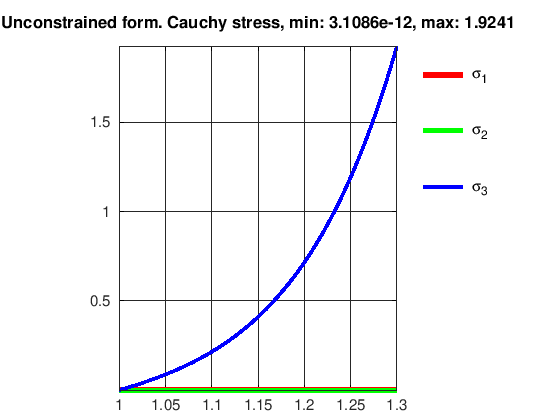

In [9]:
%Visualize stress graphs
figure; hold on; 
title(['Unconstrained form. Cauchy stress, min: ',num2str(min(S3(:))),...
', max: ',num2str(max(S3(:)))]); %Add title
h1=plot(lambda_3,S1,'r-','LineWidth',20); %The 1 direction principal stress
h2=plot(lambda_3,S2,'g-','LineWidth',15); %The 2 direction principal stress
h3=plot(lambda_3,S3,'b-','LineWidth',10); %The 3 direction principal stress
hl=legend([h1 h2 h3],{'\sigma_1','\sigma_2','\sigma_3'}); %Add legend
set(hl,'FontSize',15,'Location','NorthEastOutside','Box','off'); %Adjust legend
axis tight; axis square; grid on; box on; 
set(gca,'FontSize',15);

#### Visualize Jacobian

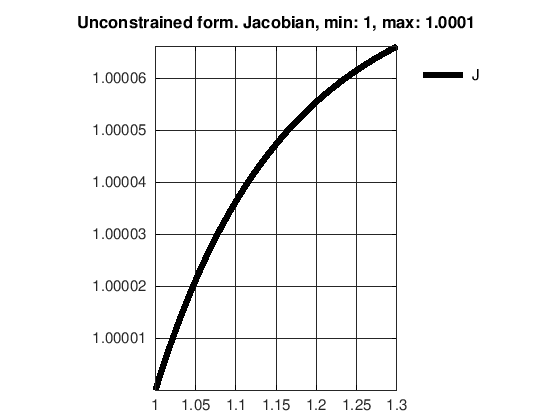

In [10]:
%Visualize Jacobian
figure; hold on; 
title(['Unconstrained form. Jacobian, min: ',num2str(min(J(:))),...
', max: ',num2str(max(J(:)))]); %Add title
h1=plot(lambda_3,J,'k-','LineWidth',20); %The 1 direction principal stress
hl=legend([h1],{'J'}); %Add legend
set(hl,'FontSize',15,'Location','NorthEastOutside','Box','off'); %Adjust legend
axis tight; axis square; grid on; box on; 
set(gca,'FontSize',15);

\newpage

## Uncoupled formulations
* Given the numerical difficulties in handling truely incompressible behaviour (theoretically requiring $\kappa=\infty$) a special class of constitutive formulations has been developed referred to as _uncoupled_ formulations.
  
  
* These uncoupled formulations are useful to model nearly-incompressible behaviour
  
  
* The term _uncoupled_ relates to the fact that strain energy density $\Psi$ is split into two additively seperated parts, namely: 
1. A purely _deviatoric_ (or isochoric = no volume change) part relating to shape change only $\Psi_{dev}$
1. A purely _volumetric_ part relating to volume change only $\Psi_{vol}$

$$\Psi=\Psi_{dev}+\Psi_{vol}$$

### Uncoupling the deformation
* To accomodate the split special shape and volume changing deformation metrics are required.   
  
  
* The Jacobian or volume ratio $J$ is already suitable  to describe volume change ($J=0.9$ means 10% volume loss, $J=1.1$ means 10% volume gain). 
  
* From the definition $J=\lambda_1\lambda_2\lambda_3$ one could imagine a single "spherical" average stretch $\lambda$ which is the same in all directions such that: 
$$J=\lambda_1\lambda_2\lambda_3=\lambda\lambda\lambda=\lambda^3 \rightarrow \lambda=J^{\frac{1}{3}}$$

* To "take away" the effect of this spherical volume changing stretch $\lambda$ from each of the stretches we can multiply them by $\frac{1}{\lambda}=J^{-\frac{1}{3}}$:
$$\tilde{\lambda}_i=J^{-\frac{1}{3}}\lambda_i$$

* This introduces the _deviatoric stretches_ denoted $\tilde{\lambda}_i$

* We can check if these deviatoric stretches really only change the shape by computing $\tilde{J}$ which should be 1 in magnitude for all stretches: 
$$\tilde{J}=\tilde{\lambda}_1\tilde{\lambda}_2\tilde{\lambda}_3=J^{-\frac{1}{3}}\lambda_1J^{-\frac{1}{3}}\lambda_2J^{-\frac{1}{3}}\lambda_3=J^{-\frac{1}{3}}J^{-\frac{1}{3}}J^{-\frac{1}{3}}\lambda_1\lambda_2\lambda_3=\frac{1}{J}J=1$$

### The uncoupled Ogden formulation
* The uncoupled Ogden formulation is given as: 
$$\Psi(\tilde{\lambda}_1,\tilde{\lambda}_2,\tilde{\lambda}_3)=\frac{\kappa}{2}\ln{(J)}^2 + \sum_{a=1}^{N} \frac{c_a}{m_a^2}\big(\tilde{\lambda}_1^{m_a}+\tilde{\lambda}_2^{m_a}+\tilde{\lambda}_3^{m_a}-3\big)$$

* Where
$$\Psi_{vol}=\frac{\kappa}{2}\ln{(J)}^2$$
    and
$$\Psi_{dev}=\sum_{a=1}^{N} \frac{c_a}{m_a^2}\big(\tilde{\lambda}_1^{m_a}+\tilde{\lambda}_2^{m_a}+\tilde{\lambda}_3^{m_a}-3\big)$$

* The principal Cauchy stresses $\sigma_i$ can be computed from: 

$$\boldsymbol{\sigma}=\boldsymbol{\sigma}_{vol}+\boldsymbol{\sigma}_{dev}$$

* The volumetric stress $\boldsymbol{\sigma}_{vol}$ is derived from: 
$$\boldsymbol{\sigma}_{vol}=p\mathbf{I}$$ 
  
    where the hydrostatic pressure is now derived directly from the constitutive equation:  
    
    $$p=\frac{\partial \Psi_{vol}}{\partial J}$$
    resulting in: 
    $$\boldsymbol{\sigma}_{vol}=\kappa\frac{\ln{(J)}}{J}\mathbf{I}$$


* The deviatoric stress $\boldsymbol{\sigma}_{dev}$ is derived from: 
$${\sigma_{dev_i}}=J^{-1} \lambda_i \frac{\partial \Psi_{dev}}{\partial \lambda_i}=J^{-1} \bigg( \tilde{\lambda}_i \frac{\partial \Psi_{dev}}{\partial \tilde{\lambda}_i} -\frac{1}{3}\sum_{j=1}^3\tilde{\lambda}_j \frac{\partial \Psi_{dev}}{\partial \tilde{\lambda}_j } \bigg)$$  

  
* Since $J=\lambda_1 \lambda_2 \lambda_3$, and $\lambda_1=\lambda_2$ (due to uniaxial loading in the 3rd direction) we can derive:  

$$J=\lambda_1 \lambda_2 \lambda_3 = \lambda_1 \lambda_1 \lambda_3 = \lambda_1^2 \lambda_3 $$
$$\rightarrow \lambda_1=\lambda_2= \sqrt{\frac{J}{\lambda_3}}$$
  
* Using 
$$\lambda_i \frac{\partial \Psi_{dev}}{\partial \tilde{\lambda}_i}=\sum_{a=1}^{N} \frac{c_a}{m_a}\tilde{\lambda}_i^{m_a}$$

    we can formulate
$$\sigma_{dev_i}=J^{-1} \sum_{a=1}^{N} \frac{c_a}{m_a} \bigg( \tilde{\lambda}_i^{m_a} -\frac{1}{3} \bigg( \tilde{\lambda}_1^{m_a} + \tilde{\lambda}_2^{m_a} + \tilde{\lambda}_3^{m_a} \bigg) \bigg)$$ 

$$\sigma_{dev_i}=J^{-1} \sum_{a=1}^{N} \frac{c_a}{m_a} \bigg( \tilde{\lambda}_i^{m_a} -\frac{1}{3} \bigg( \tilde{\lambda}_1^{m_a} + \tilde{\lambda}_2^{m_a} + \tilde{\lambda}_3^{m_a} \bigg) \bigg)$$ 

* And using $\lambda_1=\lambda_2= \sqrt{\frac{J}{\lambda_3}}$

$$\sigma_{dev_i}=J^{-1} \sum_{a=1}^{N} \frac{c_a}{m_a} \bigg( \tilde{\lambda}_i^{m_a} -\frac{1}{3} \bigg( 2\bigg(\frac{J}{\lambda_3}\bigg)^{\frac{m_a}{2}} + \tilde{\lambda}_3^{m_a} \bigg) \bigg)$$ 

* Leading to:

$$\sigma_i=\kappa\frac{\ln{(J)}}{J} + J^{-1} \sum_{a=1}^{N} \frac{c_a}{m_a} \bigg( \tilde{\lambda}_i^{m_a} -\frac{1}{3} \bigg( 2\bigg(\frac{J}{\lambda_3}\bigg)^{\frac{m_a}{2}} + \tilde{\lambda}_3^{m_a} \bigg) \bigg)$$ 

* Numerical metods are now needed to solve for J such that $\sigma_1=\sigma_2=0$ 

* **Note/tip**: To achieve nearly incompressible behaviour ($J\approx1$), the bulk modulus $\kappa$ is often set several orders of magnitude higher than the effective shear modulus (e.g. $c_1$ here). The codes here use $\kappa=1000 c_1$.

\newpage

### Numerical implementation
#### Compute stresses

In [11]:
%% The uncoupled formulation 
% One approach is to define a function for S1 and to find the J for which it is zero. 
% For this application the fzero function is useful to find J for S1(J)=0.

%Compute Jacobian given boundary conditions S1=S2=0
J=zeros(size(lambda_3)); %Initialize an arry of J values which are all zeros
for q=1:1:nDataPoints %Loop over all data points
    %Create stress function with current lambda
    S1_fun=@(J) k*(log(J)/J)+(1/J)*(c1/m1)*(sqrt(J/lambda_3(q))^m1...
    -((1/3)*(2*(J/lambda_3(q))^(m1/2)+lambda_3(q)^m1)));    
    
    %Find Jacobian for zero stress, use J=1 as initial
    J(q)=fzero(S1_fun,1); %Find root of nonlinear function   
end

%Compute transverse stretches using J values
lambda_1=sqrt(J./lambda_3);
lambda_2=lambda_1; %Due to uniaxial loading

%Compute principal stresses (note, these are not ordered)
S1=k*(log(J)./J)+(1./J).*(c1/m1).*(lambda_1.^m1-((1/3)*(lambda_1.^m1+lambda_2.^m1+lambda_3.^m1)));
S2=k*(log(J)./J)+(1./J).*(c1/m1).*(lambda_2.^m1-((1/3)*(lambda_1.^m1+lambda_2.^m1+lambda_3.^m1)));
S3=k*(log(J)./J)+(1./J).*(c1/m1).*(lambda_3.^m1-((1/3)*(lambda_1.^m1+lambda_2.^m1+lambda_3.^m1)));

#### Visualize stresses

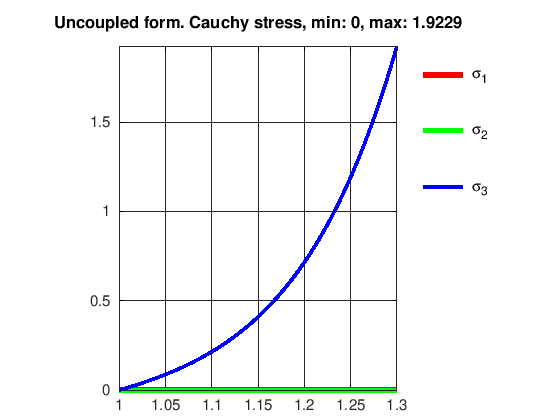

In [12]:
%Visualize stress graphs
figure; hold on; 
title(['Uncoupled form. Cauchy stress, min: ',num2str(min(S3(:))),...
', max: ',num2str(max(S3(:)))]); %Add title
h1=plot(lambda_3,S1,'r-','LineWidth',20); %The 1 direction principal stress
h2=plot(lambda_3,S2,'g-','LineWidth',15); %The 2 direction principal stress
h3=plot(lambda_3,S3,'b-','LineWidth',10); %The 3 direction principal stress
hl=legend([h1 h2 h3],{'\sigma_1','\sigma_2','\sigma_3'}); %Add legend
set(hl,'FontSize',15,'Location','NorthEastOutside','Box','off'); %Adjust legend
axis tight; axis square; grid on; box on; 
set(gca,'FontSize',15);

#### Visualize Jacobian

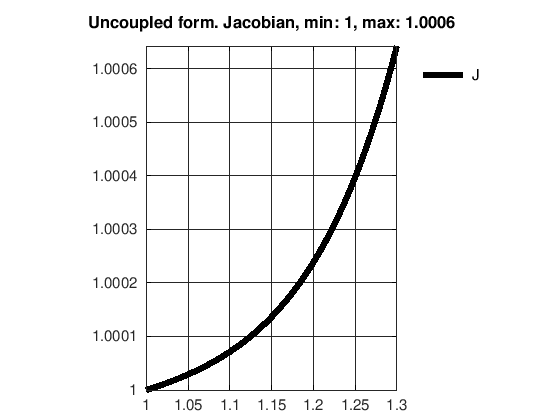

In [13]:
%Visualize Jacobian
figure; hold on; 
title(['Uncoupled form. Jacobian, min: ',num2str(min(J(:))),...
', max: ',num2str(max(J(:)))]); %Add title
h1=plot(lambda_3,J,'k-','LineWidth',20); %The 1 direction principal stress
hl=legend([h1],{'J'}); %Add legend
set(hl,'FontSize',15,'Location','NorthEastOutside','Box','off'); %Adjust legend
axis tight; axis square; grid on; box on; 
set(gca,'FontSize',15);